---
title: "An All-Pay Auction with Endogenous Entry and Pre-Contest Investment"
author:  
    - Derek J. Clark, UiT
    - Tapas Kundu, OsloMet
execute: 
    echo: false
    warning: false
    error: false
---

# Analysis of the three-stage game

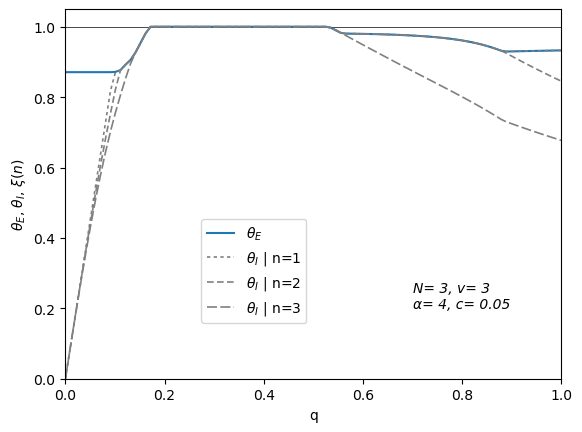

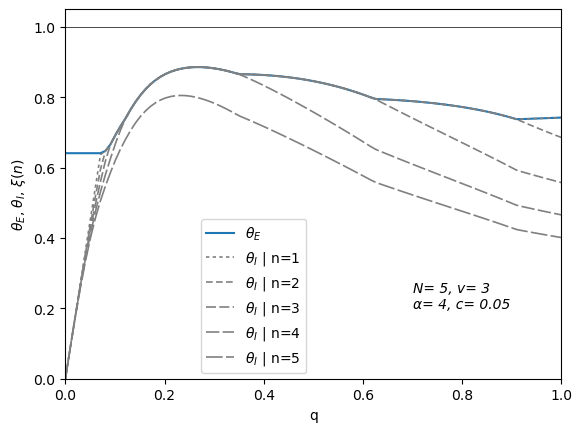

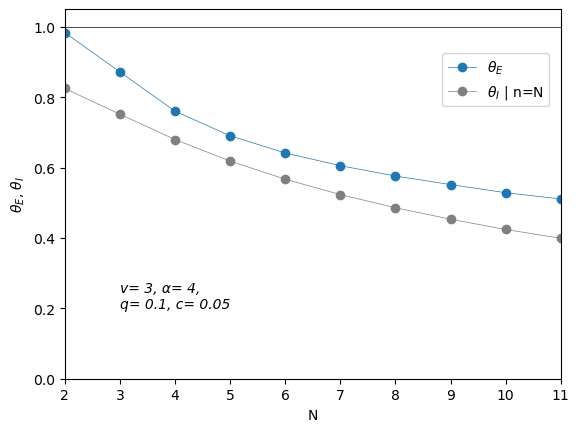

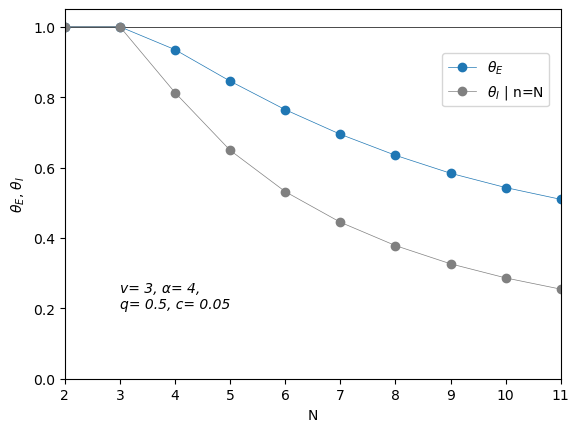

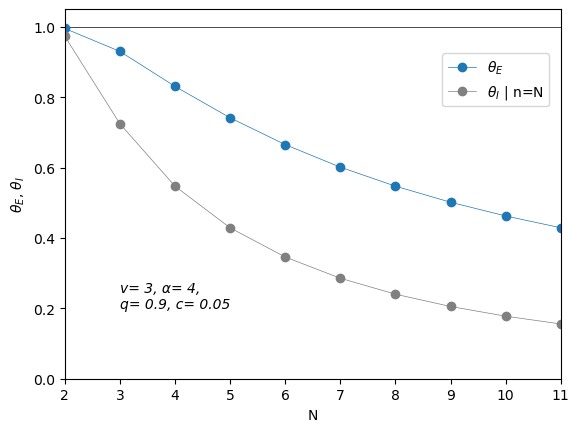

θ_E(N=2)= 0.9857721235622711
θ_E(N=3)= 0.8824353243465097
θ_E(N=4)= 0.762607444257281
θ_E(N=5)= 0.6744532510369897
θ_E(N=6)= 0.6021579386243957
θ_E(N=7)= 0.5422411150109397
θ_E(N=8)= 0.4923772996410421
[2 3 4 5 6 7 8] [0.9857721235622711, 0.8824353243465097, 0.762607444257281, 0.6744532510369897, 0.6021579386243957, 0.5422411150109397, 0.4923772996410421]
[2 3 4 5 6 7 8] [0.8518734488653974, 0.8108455917233011, 0.7562511811831018, 0.6744532510369897, 0.6021579386243957, 0.5422411150109397, 0.4923772996410421]
[3 4 5 6 7 8] [0.6253408990125184, 0.5782387901110851, 0.5397499832208171, 0.5053167537363427, 0.4745190355801031, 0.4471144127325486]
[4 5 6 7 8] [0.48115006204331173, 0.4475474920351, 0.41780892792776825, 0.3914526553420074, 0.3681811844933953]
[5 6 7 8] [0.3873361816245936, 0.36087236296886444, 0.3375467290894592, 0.31704720538051795]
[6 7 8] [0.32007247795210825, 0.2989975555886768, 0.2805360054288901]
[7 8] [0.26972598873201065, 0.25284754665309944]
[8] [0.23096499103443877]


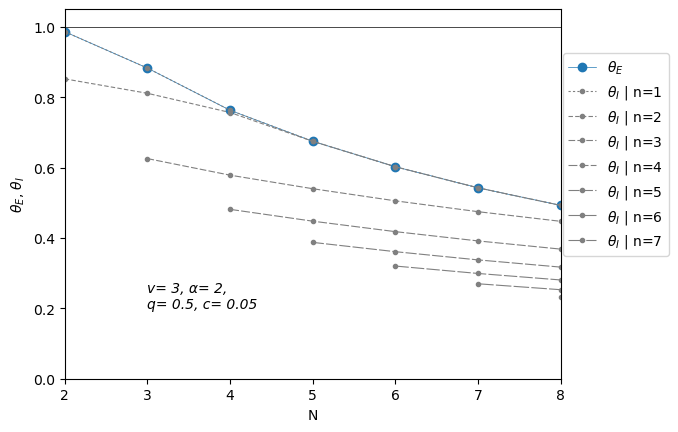

In [13]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb as binomial
from scipy.optimize import fsolve
from scipy.optimize import root_scalar
from ipywidgets import interactive
import sys

# Define the contest-payoff functions of skilled and unskilled agents
def pis(n, m, v, alpha):
    if m != 1:
        return 0
    elif n == 0:
        return 0
    elif n == 1:
        return alpha * v
    else:
        return (alpha - 1) * v

def piu(n, m, v, alpha):
    if n != 1:
        return 0
    elif m == 0:
        return v
    else:
        return 0

# Define the gain from being skilled
def delta(n, m, v, alpha):
    return pis(n, m, v, alpha) - piu(n, m - 1, v, alpha)

# Define the (gross) expected return to investment under full investment
def Xi(n, v, alpha, q):
    return (alpha - 1) * v * q * (1 - q) ** (n - 1)

# Define expected return to investment for the marginal agent
def Rt2Inv(n, v, alpha, q, theta_I, theta_E):
    return (alpha - 1) * v * q * ((1 - (q * theta_I / theta_E)) ** (n - 1)) - theta_I

# def Rt2Invtemp(n, v, alpha, q, theta_I, theta_E):
#    total_sum = 0
#    for m in range(1, n + 1):
#        total_sum += delta(n, m, v, alpha) * comb(n - 1, m - 1) * (q * theta_I / theta_E) ** (m - 1) * (1 - (q * theta_I / theta_E)) ** (n - m)
#        return q * total_sum - theta_I

# Determining the investment threshold
def theta_inv(n, v, alpha, q, theta_E):
    def func(theta):
        return Rt2Inv(n, v, alpha, q, theta, theta_E)
    if func(theta_E) > 0:
        theta_I = theta_E
    else:
        sol = fsolve(func, theta_E)
        theta_I = sol[0]
    return theta_I

# Define the expected payoff of an agent of type theta when theta_E denotes the entry threshold
def pi(n, v, alpha, q, c, theta_E, theta):
    temp_theta_inv = thetainv(n, v, alpha, q, theta_E)
    temp_xi = Xi(n, v, alpha, q)

    if theta > theta_E:
        temp_val_neq1 = 0
    else:
        if temp_xi >= theta_E:
            temp_val_neq1 = v + temp_xi - theta - c
        else:
            if temp_xi >= theta:
                temp_val_neq1 = v + temp_xi - theta - c
            else:
                temp_val_neq1 = v - c

    if theta > theta_E:
        temp_val_ngeq2 = 0
    else:
        if temp_xi >= theta_E:
            temp_val_ngeq2 = temp_xi - theta - c
        else:
            if temp_theta_inv >= theta:
                temp_val_ngeq2 = temp_theta_inv - theta - c
            else:
                temp_val_ngeq2 = -c

    if n == 0:
        return 0
    elif n == 1:
        return temp_val_neq1
    else:
        return temp_val_ngeq2

# Define the payoff of the marginal entrant
def pithetaE(n, v, alpha, q, c, theta_E):
    if n == 0:
        return 0
    elif n == 1:
        if Xi(n, v, alpha, q) >= theta_E:
            return v + Xi(n, v, alpha, q) - theta_E - c
        else:
            return v - c
    else:
        if Xi(n, v, alpha, q) >= theta_E:
            return Xi(n, v, alpha, q) - theta_E - c
        else:
            return -c
        
def pithetaE2(n, v, alpha, q, c, theta_E):
    temp_xi = Xi(n, v, alpha, q)

    if temp_xi >= theta_E:
        temp_val_neq1 = v + temp_xi - theta_E - c
    else:
        temp_val_neq1 = v - c

    if temp_xi >= theta_E:
        temp_val_ngeq2 = temp_xi - theta_E - c
    else:
        temp_val_ngeq2 = -c

    if n == 0:
        return 0
    elif n == 1:
        return temp_val_neq1
    else:
        return temp_val_ngeq2

# Define the marignal entrant's expected return to entry 
def Rt2Ent(N, v, alpha, q, c, theta_E):
    return sum([pithetaE(n, v, alpha, q, c, theta_E) * binomial(N - 1, n - 1) * (theta_E ** (n - 1)) * ((1 - theta_E) ** (N - n)) for n in range(1, N + 1)])

# Determine the entry threshold
def thetaent(N, v, alpha, q, c):
    if Xi(N, v, alpha, q) > 1 + c:
        return 1
    else:
        def func(x):
            return Rt2Ent(N, v, alpha, q, c, x)
        sol = fsolve(func, 1) #fsolve uses Powell-hybrid method; 1 is used as the initial guess
        return sol[0]

def thetaent2(N, v, alpha, q, c):
    def func(theta_E):
        return Rt2Ent(N, v, alpha, q, c, theta_E)

    if Xi(N, v, alpha, q) > 1 + c:
        return 1
    else:
        sol = root_scalar(func, bracket=[0, 1], method='brentq') #using scipy.optimize.root_scalar function
        if sol.converged:
            return sol.root
        else:
            raise ValueError("Root finding did not converge")
            
# (Tapas): I also define a thetaent3 function which uses find_root function to solve the entry threshold. 
# The find_root function can be compiled with SageMath kernel, not the Python 3 kernel. Not to used if using Python3 kernel.

#def thetaent3(N, v, alpha, q, c):
#     def func(theta_E):
#         return Rt2Ent(N, v, alpha, q, c, theta_E)
# 
#     if Xi(N, v, alpha, q) > 1 + c:
#         return 1
#     else:
#         sol = find_root(func, 0, 1)
#         if sol:
#             return sol
#         else:
#             raise ValueError("Root finding did not converge")


def plot1():
    x = np.linspace(0, 1, 100)
    y1 = [Rt2Ent(2, 3, 4, 0.5, 0.05, xi) for xi in x]
    y2 = [Xi(2, 3, 4, 0.5) - 1 - 0.05 for _ in x]
    y3 = [-0.05 for _ in x]

    plt.plot(x, y1, label="Rt2Ent")
    plt.plot(x, y2, label="Xi - 1 - 0.05")
    plt.plot(x, y3, label="-0.05")
    plt.legend()
    plt.show()

def plot2():
    x = np.linspace(0, 1, 100)
    y1 = [Rt2Ent(6, 2, 2, 0.5, 0.05, xi) for xi in x]
    y2 = [Xi(6, 2, 2, 0.5) - 1 - 0.05 for _ in x]
    y3 = [-0.05 for _ in x]

    plt.plot(x, y1, label="Rt2Ent")
    plt.plot(x, y2, label="Xi - 1 - 0.05")
    plt.plot(x, y3, label="-0.05")
    plt.legend()
    plt.show()

def plot3():
    q_values = np.linspace(0, 1, 1000)
    theta_E_values = [thetaent3(3, 3, 4, q, 0.05) for q in q_values]
    xi1_values = [Xi(1, 3, 4, q) for q in q_values]
    xi2_values = [Xi(2, 3, 4, q) for q in q_values]
    xi3_values = [Xi(3, 3, 4, q) for q in q_values]

    plt.plot(q_values, theta_E_values, 'k-', label="\u03B8_E", linewidth=1)
    plt.plot(q_values, xi1_values, 'b:', label="\u03BE(1)", linewidth=1)
    plt.plot(q_values, xi2_values, 'r:', label="\u03BE(2)", linewidth=1)
    plt.plot(q_values, xi3_values, 'g:', label="\u03BE(3)", linewidth=1)

    plt.xlabel("q")
    plt.ylabel("$\u03B8_E$")
    plt.legend()
    plt.grid(0)
    plt.xlim(0, 1)
    plt.ylim(0, 1.05)
    plt.gca().set_aspect(0.8, adjustable='box')
    plt.show()

def interactive_theta_ent(N, v, alpha, c=0.05):
    q_values = np.linspace(0, 1, 100)
    theta_ent_values = np.array([thetaent2(N, v, alpha, q, c) for q in q_values])

    plt.plot(q_values, theta_ent_values, label="$\u03B8_E$")
    plt.xlabel("q")
    plt.ylabel("$\u03B8_E$")
    plt.xlim(0, 1)
    plt.ylim(0, 1.05)
    plt.legend()
    plt.show()

interactive_plot = interactive(interactive_theta_ent, N=(1, 10, 1), v=(1, 10, 1), alpha=(1, 10, 1))

#RegionPlot for full and limited entry 

def regionplot1(N, v, c):
    # Define the range for q and alpha
    q_values = np.linspace(0, 1, 100)
    alpha_values = np.linspace(1, 5, 100)
    q_grid, alpha_grid = np.meshgrid(q_values, alpha_values)
     
    condition_values = np.array([thetaent3(N, v, alpha, q, c)>= 1 for q, alpha in zip(q_grid.ravel(), alpha_grid.ravel())])
    condition_matrix = condition_values.reshape(q_grid.shape)

    # Plot the region where the condition is True
    plt.figure()
    plt.imshow(condition_matrix, origin='lower', extent=[0, 1, 1, 5], aspect='auto', cmap='binary')
    plt.colorbar(label='Condition')
    plt.xlabel('q')
    plt.ylabel('alpha')
    plt.title('Region Plot')
    plt.show()

#Plot theta_entry and theta_investment against q

def plot_theta_q(filename, N, v, alpha, c):
    n_values = np.arange(N) + 1
    q_values = np.linspace(0, 1, 100)
    y_values = np.array([1 for q in q_values])
    theta_ent_values_q = np.array([thetaent2(N, v, alpha, q, c) for q in q_values])
    theta_inv_values_q = np.array([[theta_inv(n, v, alpha, q, thetaent2(N, v, alpha, q, c)) for q in q_values] for n in n_values])
    xi_values_q = np.array([[Xi(n, v, alpha, q) for q in q_values] for n in n_values])
    plt.plot(q_values, y_values, color='black', lw= 0.5, label="$1$")
    plt.plot(q_values, theta_ent_values_q, lw= 1.5, label="$\u03B8_E$")
    for i in n_values: plt.plot(q_values, theta_inv_values_q[i-1], color='grey', lw= 1.2, linestyle=(0,(2*i,2,2*i,2)), label=f'$\u03B8_I$ | n={i}')
    # for i in n_values: plt.plot(q_values, xi_values_q[i-1], color='red', lw= 0.5, linestyle=(0,(2,2,2,2)), label=f'$\u03BE({i})')
    plt.xlabel("q")
    plt.ylabel("$\u03B8_E$, $\u03B8_I$, $\u03BE(n)$")
    plt.xlim(0, 1)
    plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'N= {N}, v= {v}' '\n' f'\u03B1= {alpha}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.7, 0.2, text, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = np.arange(N + 1)+1 # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels, bbox_to_anchor=(0.5,0.45))
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    #show the plot
    plt.show()


#Plot theta_entry and theta_investment against N

def plot_theta_N(filename, v, alpha, q, c):
    n_values = np.arange(2, 12, 1)
    y_values = np.array([1 for n in n_values])
    theta_ent_values_N = np.array([thetaent2(n, v, alpha, q, c) for n in n_values])
    theta_inv_values_N = np.array([theta_inv(n, v, alpha, q, thetaent2(n, v, alpha, q, c)) for n in n_values])
    plt.plot(n_values, y_values, color='black', lw= 0.5, label="$1$")
    plt.plot(n_values,theta_ent_values_N, marker='o', lw=0.5, label="$\u03B8_E$")
    #for scatter plot, use the following: plt.scatter(n_values, theta_ent_values_N, s=10, label="$\u03B8_E$")
    plt.plot(n_values, theta_inv_values_N, marker='o', color='grey', lw= 0.5, label="$\u03B8_I$ | n=N")
    plt.xlabel("N")
    plt.ylabel("$\u03B8_E$, $\u03B8_I$")
    plt.xlim(2, 11)
    plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'v= {v}, \u03B1= {alpha},' '\n' f'q= {round(q, 2)}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(3, 0.2, text, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [1, 2]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels, bbox_to_anchor=(0.99,0.9))
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    # show the plot
    plt.show()

def plot_theta_N2(filename, v, alpha, q, c, n_max):
    #constructing arrays
    n_min=2
    n_values = np.arange(n_min, n_max, 1)
    y_values = np.array([1 for n in n_values])
    theta_ent_values_N2 = np.array([thetaent2(n, v, alpha, q, c) for n in n_values])
    for n in n_values:
        k = n - n_min 
        print(f'\u03B8_E(N={n})=', theta_ent_values_N2[k])
    #following commands create an unbalanced array where i-th row (0,...,10) and jth col (0...11) gives theta-inv threshold when #entrants=j+1 and #players=i+2
    rows = n_max - n_min + 1 # number of rows
    theta_inv_values_N_2d = [] #creating an empty list to store rows
    for i in range(rows):
        row = [] #creating an empty list for each row
        for j in range(i+2): #note that the first row will have two entries corresponding to n=1&N=2 and n=2&N=2, the second row with three and so on
            row.append(theta_inv(j+1, v, alpha, q, thetaent2(i+2, v, alpha, q, c)))
        theta_inv_values_N_2d.append(row) 
    for j in range(rows):
        x_values = []
        x_values = np.arange(max(n_min,j+1), n_max, 1)
        y2_values = []
        for i in x_values: 
            k = i -2
            y2_values.append(theta_inv_values_N_2d[k][j]) 
        print(x_values , y2_values)
    #making plots
    plt.plot(n_values, y_values, color='black', lw= 0.5, label="$1$")
    plt.plot(n_values,theta_ent_values_N2, marker='o', lw=0.5, label="$\u03B8_E$")
    #the following command will make n_max number of plots: we pick a number i, and plot theta_inv values such that #entrants=i (which is valid when N>=i). 
    #This is why it will be plotted against N-values starting from i up to n_max. So, the x-axis values are moving with each plot.
    for j in range(rows):
        x_values = []
        x_values = np.arange(max(n_min,j+1), n_max, 1)
        y2_values = []
        for i in x_values:
            k = i -2
            y2_values.append(theta_inv_values_N_2d[k][j]) 
        plt.plot(x_values, y2_values, color='grey', marker='o', markersize=3 ,lw= 0.8, linestyle=(0,(2*(j+1),2,2*(j+1),2)), label=f'$\u03B8_I$ | n={j+1}')
    #axes specification
    plt.xlabel("N")
    plt.ylabel("$\u03B8_E$, $\u03B8_I$")
    plt.xlim(2, n_max-1)
    plt.ylim(0, 1.05)
    #adding a text box with parameter specification
    text = f'v= {v}, \u03B1= {alpha},' '\n' f'q= {round(q, 2)}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(3, 0.2, text, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = np.arange(1, n_max, 1)  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels, bbox_to_anchor=(0.99,0.9))
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    # show the plot
    plt.show()

    
# Plotting the figures
# plot1()
# plot2()
# plot3()
# interactive_plot
# regionplot1(5, 5, 0.05)
  
plot_theta_q('theta_vs_q_Neq3',3, 3, 4, 0.05)
plot_theta_q('theta_vs_q_Neq5',5, 3, 4, 0.05)
  
plot_theta_N('theta_vs_N_qeq0.1', 3, 4, 0.1, 0.05)
plot_theta_N('theta_vs_N_qeq0.5', 3, 4, 0.5, 0.05)
plot_theta_N('theta_vs_N_qeq0.9', 3, 4, 0.9, 0.05)

plot_theta_N2('theta_vs_N_diff_n_qeq0.5', 3, 2, 0.5, 0.05, 9)

# The designer's problem

## Maximising fees collected

There are two ways we can approach this problem. 

Approach 1: For a given value of entry cost c, we can solve for a unique entry threshold theta_E. For a given theta_E, the number of entrants would be random. When there are n entrants, fees collected is n*c, where n follows Binomial (N,theta_E). Therefore, the expected fees collected will be given by c*E(n)=c*N*theta_E where theta_E solves the entry threshold condition described in the paper. As we have already constructed the entry threshold as a function of c, we can work with the theta_ent function here. 

Approach 2: Since the entry fee c and the entry threshold theta_E have a one-to-one relationship whenever the entry threshold is below one, we can consider any arbitrary theta and find out for what value of c (call it c-hat) that theta would be the entry threshold. Then, for that given theta, the fees collected would be the same as c-hat times the number of entrants. As before the number of entrant is random, and we take the expected value of it, which is N*theta. Therefore, starting from a theta, we can determine the total fees collected as N*theta*c-hat where c-hat solves the entry indifference condition. Further, as c just added as a linear component in the return to entry function, c-hat is simply the return to entry function computed with the entry cost equaling zero. In this way we can compute the fees collected for every possible theta below one. One has to be careful following this approach when theta equals one, since c and entry threshold no longer holds a one-to-one relationship. However, we can possibly ignore the case because of continuity. To be more rigorous, we have to find out the condition when theta_E equals 1 (i.e., xi(N)-1-c>=0), and in this case, explicitly add c-hat to be Xi(N)-1.

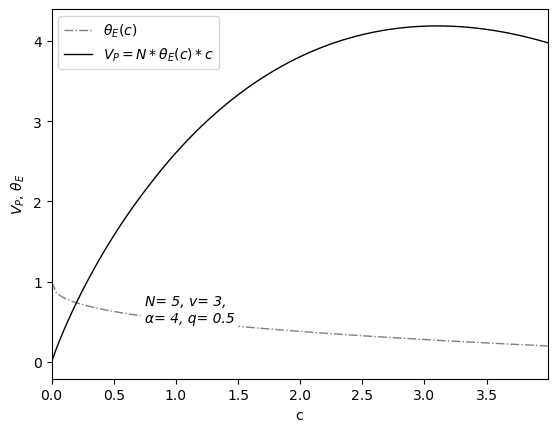

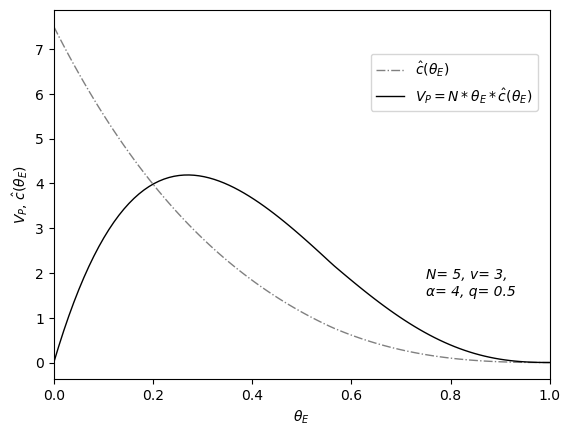

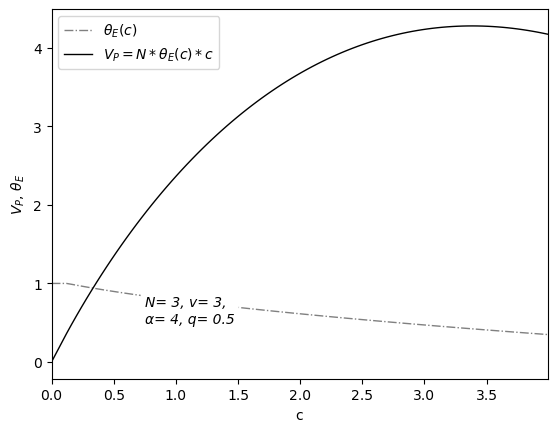

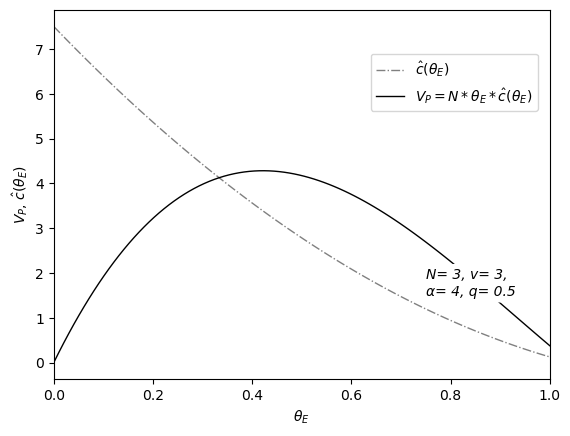

In [14]:
def plot_fees1_c(filename, N, v, alpha, q):
    c_values = np.linspace(0, 3.99, 100)
    theta_ent_values_c = np.array([thetaent2(N, v, alpha, q, c) for c in c_values])
    total_fees_values_c = np.array([N * c * thetaent2(N, v, alpha, q, c) for c in c_values])
    plt.plot(c_values, theta_ent_values_c, color = 'grey', linestyle='-.', lw= 1.0, label="$\u03B8_E(c)$")
    plt.plot(c_values, total_fees_values_c, color = 'black', linestyle='-', lw= 1.0, label="$V_P=N*\u03B8_E(c)*c$")
    plt.xlabel("c")
    plt.ylabel("$V_P$, $\u03B8_E$")
    plt.xlim(0, 3.99)
    #plt.ylim(0, 3)
    #adding parameter specification
    text = f'N= {N}, v= {v},' '\n' f'\u03B1= {alpha}, q= {round(q, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.75, 0.5, text, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0, 1]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels)
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    # show the plot
    plt.show()
    
def plot_fees1_theta(filename, N, v, alpha, q):
    theta_values = np.linspace(0, 1, 100)
    fees_values_theta = np.array([Rt2Ent(N, v, alpha, q, 0, x) for x in theta_values]) #entry cost that would make theta as the entry threshold
    total_fees_values_theta = np.array([N * x * Rt2Ent(N, v, alpha, q, 0, x) for x in theta_values])
    plt.plot(theta_values, fees_values_theta, color = 'grey', linestyle='-.', lw= 1.0, label="$\hat{c}(\u03B8_E)$")
    plt.plot(theta_values, total_fees_values_theta, color = 'black', linestyle='-', lw= 1.0, label="$V_P=N*\u03B8_E*\hat{c}(\u03B8_E)$")
    plt.xlabel("$\u03B8_E$")
    plt.ylabel("$V_P$, $\hat{c}(\u03B8_E)$")
    plt.xlim(0, 1)
    #plt.ylim(0, 10)
    #adding parameter specification
    text = f'N= {N}, v= {v},' '\n' f'\u03B1= {alpha}, q= {round(q, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.75, 1.5, text, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0, 1]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels, bbox_to_anchor=(0.99,0.9))
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    # show the plot
    plt.show()


plot_fees1_c('Vp_vs_c_Neq6', 5, 3, 4, 0.5)
plot_fees1_theta('Vp_vs_thetaE_Neq6', 5, 3, 4, 0.5)

plot_fees1_c('Vp_vs_c_Neq2', 3, 3, 4, 0.5)    
plot_fees1_theta('Vp_vs_thetaE_Neq2', 3, 3, 4, 0.5)

## Maximising the total contest-stage effort

/var/folders/_j/gh2bhk_n7fd1c88q7ffvks7h0000gn/T/ipykernel_16613/2221135382.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  return (alpha - 1) * v * q * ((1 - (q * theta_I / theta_E)) ** (n - 1)) - theta_I


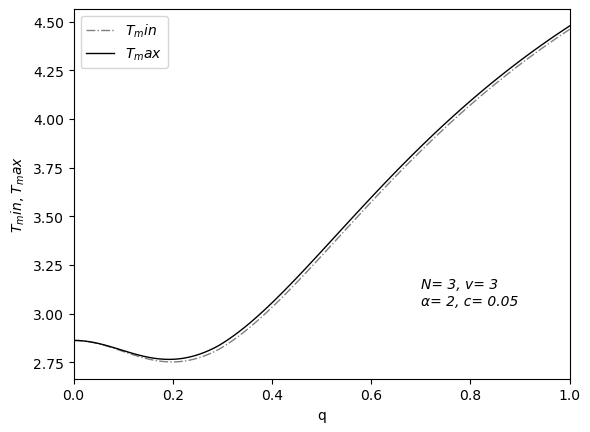

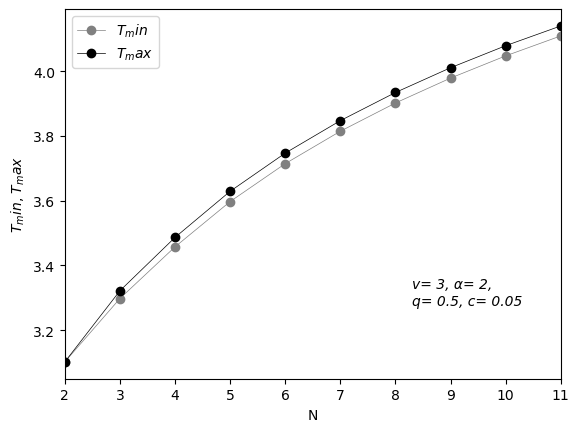

In [15]:
# Define the aggregate contest-stage effort 
def t_max(n, m, v, alpha):
    if n <= 1:
        return 0
    elif m == 0:
        return v
    elif m >= 2:
        return alpha * v
    else:
        return ((alpha + 1) * v)/(2 * alpha)

def t_min(n, m, v, alpha):
    if n <= 1:
        return 0
    elif m == 0:
        return v
    elif m >= 2:
        return alpha * v
    else:
        return (v/n) * (((n - 1)**2 * alpha**2) - (((2*n) - 1) * (n - 1) * alpha) + 
                        n**2 - ((n - 1)**2 * (alpha - 1)**(((2*n) - 1) / (n - 1)) * alpha**((-1) / (n - 1)))) 

# From a given N, we compute theta_ent. The number of entrant n is a random draw from Binomial(N,theta_ent). From a given n and theta_ent,
# we compute theta_inv. The number of skilled agents is a random draw from Binomial(n,q*theta_inv/theta_ent). Once we have n and m, we can
# compute the total contest-stage effort values t_min and t_max. Therefore, the expected total effort will be sum of two binomial series, 
# first over possible values of m given n, and then over possible values of n. Specifically, it is given by 
# Sum{n=0,n=N}(NCn)(theta_ent^n)((1-theta_ent)^N-n)f(n) where f(n)=Sum{m=0,m=n}(nCm)(q*theta_inv/theta_ent^n)((1-theta_ent)^N-n)f(n) 
# The parameters are N, v, alpha, q, and c. 


def Ex_t_min(n, v, alpha, q, theta_E):
    tp1 = (q * theta_inv(n, v, alpha, q, theta_E))/theta_E
    t_min_sum1 = sum([t_min(n, m, v, alpha) * binomial(n, m) * (tp1 ** m) * ((1 - tp1) ** (n - m)) for m in range(n + 1)])
    return t_min_sum1

def D2Ex_t_min(N, v, alpha, q, c):
    tp2 = thetaent2(N, v, alpha, q, c)
    t_min_sum2 = sum([Ex_t_min(n, v, alpha, q, tp2) * binomial(N, n) * (tp2 ** n) * ((1 - tp2) ** (N - n)) for n in range(N + 1)])
    return t_min_sum2

def Ex_t_max(n, v, alpha, q, theta_E):
    tp1 = (q * theta_inv(n, v, alpha, q, theta_E))/theta_E
    t_max_sum1 = sum([t_max(n, m, v, alpha) * binomial(n, m) * (tp1 ** m) * ((1 - tp1) ** (n - m)) for m in range(n + 1)])
    return t_max_sum1

def D2Ex_t_max(N, v, alpha, q, c):
    tp2 = thetaent2(N, v, alpha, q, c)
    t_max_sum2 = sum([Ex_t_max(n, v, alpha, q, tp2) * binomial(N, n) * (tp2 ** n) * ((1 - tp2) ** (N - n)) for n in range(N + 1)])
    return t_max_sum2

# Plot total expected effort against q

def plot_teffort_q(filename, N, v, alpha, c):
    q_values = np.linspace(0, 1, 100)
    tmin_values_q = np.array([D2Ex_t_min(N, v, alpha, q, c) for q in q_values])
    tmax_values_q = np.array([D2Ex_t_max(N, v, alpha, q, c) for q in q_values])
    theta_ent_values_N = np.array([thetaent2(N, v, alpha, q, c) for q in q_values])
    plt.plot(q_values, tmin_values_q, color = 'grey', linestyle='-.', lw= 1.0, label="$T_min$")
    plt.plot(q_values, tmax_values_q, color = 'black', linestyle='-', lw= 1.0, label="$T_max$")
    #plt.plot(q_values,theta_ent_values_N, lw=1.5, label="$\u03B8_E$")
    plt.xlabel("q")
    plt.ylabel("$T_min$, $T_max$")
    plt.xlim(0, 1)
    #plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'N= {N}, v= {v}' '\n' f'\u03B1= {alpha}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.7, 0.2, text, transform=plt.gca().transAxes, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0, 1]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels)
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    #show the plot
    plt.show()
    
# Plot total expected effort against N

def plot_teffort_N(filename, v, alpha, q, c):
    n_values = np.arange(2, 12, 1)
    tmin_values_N = np.array([D2Ex_t_min(N, v, alpha, q, c) for N in n_values])
    tmax_values_N = np.array([D2Ex_t_max(N, v, alpha, q, c) for N in n_values])
    theta_ent_values_N = np.array([thetaent2(N, v, alpha, q, c) for N in n_values])
    plt.plot(n_values, tmin_values_N, color='grey', marker='o', lw=0.5, label="$T_min$")
    plt.plot(n_values, tmax_values_N, color='black', marker='o', lw=0.5, label="$T_max$")
    #plt.plot(n_values,theta_ent_values_N, marker='o', lw=0.5, label="$\u03B8_E$")
    plt.xlabel("N")
    plt.ylabel("$T_min$, $T_max$")
    plt.xlim(2, 11)
    #plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'v= {v}, \u03B1= {alpha},' '\n' f'q= {round(q, 2)}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.7, 0.2, text, transform=plt.gca().transAxes, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0, 1]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels)
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    # show the plot
    plt.show()
    
plot_teffort_q('effort_vs_q_Neq3', 3, 3, 2, 0.05)
plot_teffort_N('effort_vs_N_qeq0.5', 3, 2, 0.5, 0.05)

## Maximizing the expected number of skilled agent and the expected number of investors

From a given N, we compute theta_ent. The number of entrant n is a random draw from Binomial(N,theta_ent). From a given n and theta_ent, we compute theta_inv. The number of skilled agents is a random draw from Binomial(n,q*theta_inv/theta_ent). Further, the expected value of m is n.q.(theta_inv/theta_ent). In this case, both n and theta_inv, which is a function of n, are variables. So the expected value of their product (times q/theta_ent) is not a simple one. We will use the binomial sum to compute the mean. And, it is given by Sum{n=0,n=N}(NCn)(theta_ent^n)((1-theta_ent)^N-n)f(n) where f(n)=n.q.(theta_inv(n)/theta_ent). The parameters are N, v, alpha, q, and c. 

q has a direct increasing effect on the expected number of skilled agent - this is because as q gets smaller, an agent's chance of being skilled gets low, even if she might be making the same decision of investment as she was doing with a high q. Therefore, the expected number does not fully capture how incentives for investment might be changing with q. I am computing another measure which would take into account only the probabilities of investing (not realizing skill). When the number of entrant n is realized, there will be n+1 potential distinct events, in which none investing, or one investing, ... or all investing. For example, the probability of all investing is (theta_inv/theta_ent)^n. the prob of n-1 investing is nC(n-1)*(theta_inv/theta_ent)^(n-1)*(1-(theta_inv/theta_ent)), and so on. I calculate the expected number of investors which is similar to the expected number of skilled agents, only the q-factor would be missing in the success probability. Note that here the investment threshold will still depend on q. The expected number of investor would be n*theta_inv/theta_ent given n, and therefore the final expected number is Sum{n=0,n=N}(NCn)(theta_ent^n)((1-theta_ent)^N-n)f(n) where f(n)=n.(theta_inv(n)/theta_ent).

/var/folders/_j/gh2bhk_n7fd1c88q7ffvks7h0000gn/T/ipykernel_16613/2221135382.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  return (alpha - 1) * v * q * ((1 - (q * theta_I / theta_E)) ** (n - 1)) - theta_I


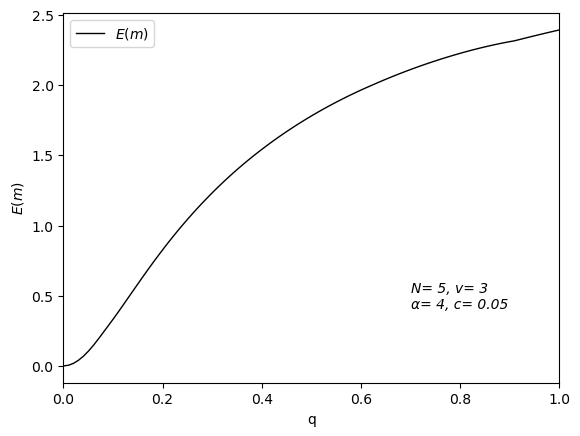

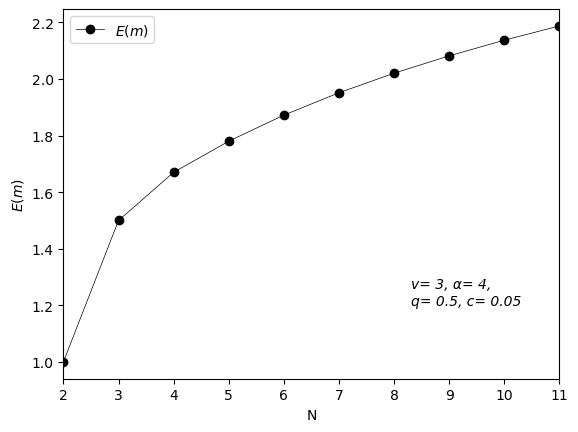

/var/folders/_j/gh2bhk_n7fd1c88q7ffvks7h0000gn/T/ipykernel_16613/2221135382.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  return (alpha - 1) * v * q * ((1 - (q * theta_I / theta_E)) ** (n - 1)) - theta_I


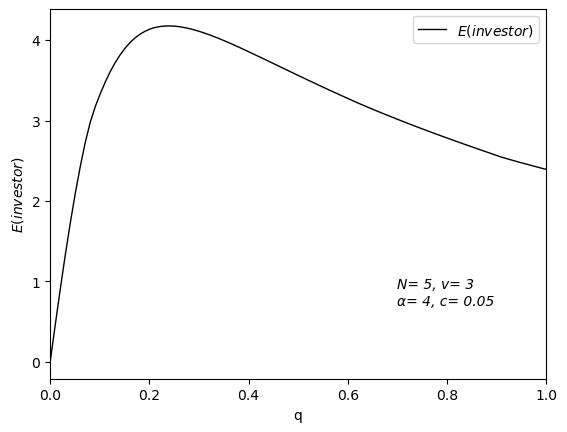

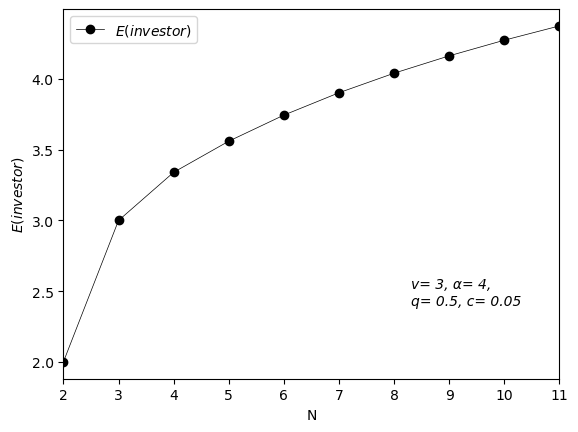

In [16]:
def Ex_skill(N, v, alpha, q, c):
    tp = thetaent2(N, v, alpha, q, c)
    sk_sum = sum([(n * q * (theta_inv(n, v, alpha, q, tp) / tp)) * binomial(N, n) * (tp ** n) * ((1 - tp) ** (N - n)) for n in range(N + 1)])
    return sk_sum

def Ex_investor(N, v, alpha, q, c):
    tp = thetaent2(N, v, alpha, q, c)
    sk_sum = sum([(n * (theta_inv(n, v, alpha, q, tp) / tp)) * binomial(N, n) * (tp ** n) * ((1 - tp) ** (N - n)) for n in range(N + 1)])
    return sk_sum

# Plot the expected number of skilled agents against q

def plot_tskill_q(filename, N, v, alpha, c):
    q_values = np.linspace(0, 1, 100)
    sk_values_q = np.array([Ex_skill(N, v, alpha, q, c) for q in q_values])
    theta_ent_values_N = np.array([thetaent2(N, v, alpha, q, c) for q in q_values])
    plt.plot(q_values, sk_values_q, color = 'black', linestyle='-', lw= 1.0, label="$E(m)$")
    #plt.plot(q_values,theta_ent_values_N, lw=1.5, label="$\u03B8_E$")
    plt.xlabel("q")
    plt.ylabel("$E(m)$")
    plt.xlim(0, 1)
    #plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'N= {N}, v= {v}' '\n' f'\u03B1= {alpha}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.7, 0.2, text, transform=plt.gca().transAxes, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels)
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    #show the plot
    plt.show()
    
def plot_tinvestor_q(filename, N, v, alpha, c):
    q_values = np.linspace(0, 1, 100)
    tinv_values_q = np.array([Ex_investor(N, v, alpha, q, c) for q in q_values])
    theta_ent_values_N = np.array([thetaent2(N, v, alpha, q, c) for q in q_values])
    plt.plot(q_values, tinv_values_q, color = 'black', linestyle='-', lw= 1.0, label="$E(investor)$")
    #plt.plot(q_values,theta_ent_values_N, lw=1.5, label="$\u03B8_E$")
    plt.xlabel("q")
    plt.ylabel("$E(investor)$")
    plt.xlim(0, 1)
    #plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'N= {N}, v= {v}' '\n' f'\u03B1= {alpha}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.7, 0.2, text, transform=plt.gca().transAxes, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels)
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    #show the plot
    plt.show()
    
# Plot the expected number of skilled agents against N

def plot_tskill_N(filename, v, alpha, q, c):
    n_values = np.arange(2, 12, 1)
    sk_values_N = np.array([Ex_skill(N, v, alpha, q, c) for N in n_values])
    theta_ent_values_N = np.array([thetaent2(N, v, alpha, q, c) for N in n_values])
    plt.plot(n_values, sk_values_N, color='black', marker='o', lw=0.5, label="$E(m)$")
    #plt.plot(n_values,theta_ent_values_N, marker='o', lw=0.5, label="$\u03B8_E$")
    plt.xlabel("N")
    plt.ylabel("$E(m)$")
    plt.xlim(2, 11)
    #plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'v= {v}, \u03B1= {alpha},' '\n' f'q= {round(q, 2)}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.7, 0.2, text, transform=plt.gca().transAxes, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels)
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    # show the plot
    plt.show()
    
def plot_tinvestor_N(filename, v, alpha, q, c):
    n_values = np.arange(2, 12, 1)
    tinv_values_N = np.array([Ex_investor(N, v, alpha, q, c) for N in n_values])
    theta_ent_values_N = np.array([thetaent2(N, v, alpha, q, c) for N in n_values])
    plt.plot(n_values, tinv_values_N, color='black', marker='o', lw=0.5, label="$E(investor)$")
    #plt.plot(n_values,theta_ent_values_N, marker='o', lw=0.5, label="$\u03B8_E$")
    plt.xlabel("N")
    plt.ylabel("$E(investor)$")
    plt.xlim(2, 11)
    #plt.ylim(0, 1.05)
    #adding parameter specification
    text = f'v= {v}, \u03B1= {alpha},' '\n' f'q= {round(q, 2)}, c= {round(c, 2)}'
    box_props = dict(facecolor='white', edgecolor='none', boxstyle='round')
    font_properties = {'family': 'sans-serif', 'size': 10, 'weight': 'normal', 'style': 'oblique', 'color': 'black'}
    plt.text(0.7, 0.2, text, transform=plt.gca().transAxes, bbox=box_props, fontdict=font_properties)
    #adding legends
    handles, labels = plt.gca().get_legend_handles_labels()
    include_legends = [0]  # Index of the legends to include
    selected_handles = [handles[i] for i in include_legends]
    selected_labels = [labels[i] for i in include_legends]
    plt.legend(selected_handles, selected_labels)
    #saving the plot file
    plt.savefig(f'{filename}.pdf')  # Save as PDF format
    # show the plot
    plt.show()
    
plot_tskill_q('Sk_no_vs_q_Neq3', 5, 3, 4, 0.05)
plot_tskill_N('Sk_no_vs_N_qeq0.5', 3, 4, 0.5, 0.05)

    
plot_tinvestor_q('Inv_no_vs_q_Neq3', 5, 3, 4, 0.05)
plot_tinvestor_N('Inv_no_vs_N_qeq0.5', 3, 4, 0.5, 0.05)